In [1]:
# TEMP: Import lagom
# Not useful once lagom is installed
import sys
sys.path.append('/home/zuo/Code/lagom/')

In [2]:
from lagom.contrib import CMAES, OpenAIES, ESOptimizer

In [3]:
def solve(es_optimizer, max_iter, log_interval=1):
    """
    Solve
    
    Args:
        es_optimizer (ESOptimizer): ES optimizer
        max_iter (int): maximum number of iterations (generations)
        log_interval (int): log interval
    """
    list_best_f_val = []
    
    for i in range(max_iter):
        # Perform one iteration
        results = es_optimizer.step()
        
        # Logging
        best_f_val = results['best_f_val']
        list_best_f_val.append(best_f_val)
        if i == 0 or (i+1)%log_interval == 0:
            print(f'Objective function value at iteration #{i+1}: {best_f_val}')
    
    # Final logging
    best_param = results['best_param']
    print(f'# Local optimum discovered by ES solver: {best_param}')
    print(f'# Its objective function value: {best_f_val}')
    
    return list_best_f_val

In [4]:
import matplotlib.pyplot as plt
import numpy as np


class TestFunctions(object):
    def __call__(self, x):
        raise NotImplementedError
        
        
class Rastrigin(TestFunctions):
    """
    Rastrigin test objective function for optimization
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    """
    def __init__(self):
        self.search_domain = [-5.12, 5.12]
    
    def __call__(self, x):
        A = 10
        y = A*len(x)
        for x_part in x:
            y += x_part**2 - A*np.cos(2*np.pi*x_part)

        return y

class Sphere(TestFunctions):
    def __init__(self, min=-1000, max=1000):
        self.search_domain = [min, max]
    
    def __call__(self, x):
        y = 0.0
        for x_part in x:
            y += x_part**2

        return y
    
class StyblinskiTang(TestFunctions):
    def __init__(self):
        self.search_domain = [-5, 5]
    
    def __call__(self, x):
        y = 0.0
        for x_part in x:
            y += x_part**4 - 16*x_part**2 + 5*x_part

        return 0.5*y
    
class HolderTable(TestFunctions):
    def __init__(self):
        self.search_domain = [-10, 10]
    
    def __call__(self, x):
        x, y = x
        
        y = -np.abs(np.sin(x)*np.cos(y)*np.exp(np.abs(1 - np.sqrt(x**2 + y**2)/np.pi)))
        
        return y

def plot_contour(f, num_points=100):
    x = np.linspace(*f.search_domain, num=num_points)
    y = np.linspace(*f.search_domain, num=num_points)
    x, y = np.meshgrid(x, y)
    
    # Compute function values
    z = f([x, y])
    
    fig, ax = plt.subplots(1, 1)
    ax.contourf(x, y, z, cmap='jet')
    
    return fig

plot_contour(Rastrigin())

<Figure size 640x480 with 1 Axes>

In [6]:
cmaes = CMAES(mu0=[3]*100, 
              std0=0.5, 
              popsize=100, 
              weight_decay=0.0)
openaies = OpenAIES(mu0=[3]*100, 
                    std0=0.5, 
                    popsize=100, 
                    weight_decay=0.0, 
                    std_decay=0.999,
                    min_std=0.01, 
                    lr=1e-1, 
                    lr_decay=1.0, 
                    min_lr=None)

es_optimizer = ESOptimizer(openaies, Rastrigin())
result = solve(es_optimizer=es_optimizer, 
               max_iter=4000, 
               log_interval=100)

(50_w,100)-aCMA-ES (mu_w=27.0,w_1=8%) in dimension 100 (seed=829086, Mon Jun 11 19:25:24 2018)
Objective function value at iteration #1: 2104.437683417641
Objective function value at iteration #100: 1300.970243252562
Objective function value at iteration #200: 1238.122336055058
Objective function value at iteration #300: 1196.7168235056686
Objective function value at iteration #400: 1228.3458444008384
Objective function value at iteration #500: 1170.9209219571617
Objective function value at iteration #600: 1065.0315389762563
Objective function value at iteration #700: 972.4201707166459
Objective function value at iteration #800: 963.1685791687526
Objective function value at iteration #900: 826.649282185902
Objective function value at iteration #1000: 869.7510919465738
Objective function value at iteration #1100: 775.4816436442717
Objective function value at iteration #1200: 704.046058995144
Objective function value at iteration #1300: 595.4333536741783
Objective function value at itera

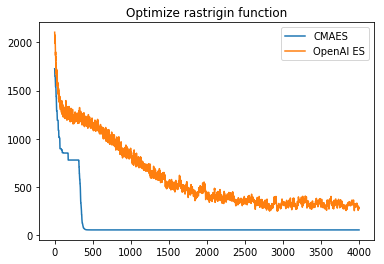

In [12]:
import matplotlib.pyplot as plt

plt.plot(result_cmaes, label='CMAES')
plt.plot(result_openaies, label='OpenAI ES')
plt.title('Optimize rastrigin function')
plt.legend()

plt.savefig('tmp.png')

In [8]:
es_optimizer = ESOptimizer(cmaes, Rastrigin())
result_cmaes = solve(es_optimizer=es_optimizer, 
               max_iter=4000, 
               log_interval=100)

Objective function value at iteration #1: 1726.2229863397984
Objective function value at iteration #100: 857.6170773420397
Objective function value at iteration #200: 780.5624451259364
Objective function value at iteration #300: 780.5624451259364
Objective function value at iteration #400: 62.36249320778352
Objective function value at iteration #500: 56.71738333696869
Objective function value at iteration #600: 56.71264501366498
Objective function value at iteration #700: 56.71264106773987
Objective function value at iteration #800: 56.71264106522302
Objective function value at iteration #900: 56.71264106522249
Objective function value at iteration #1000: 56.71264106522249
Objective function value at iteration #1100: 56.71264106522249
Objective function value at iteration #1200: 56.71264106522249
Objective function value at iteration #1300: 56.71264106522249
Objective function value at iteration #1400: 56.71264106522249
Objective function value at iteration #1500: 56.71264106522249
Obj